In [ ]:
import seaborn as sns 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl

In [ ]:
diabetes=pd.read_csv('diabetes.csv')



In [ ]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes1=diabetes.drop('Age',axis=1)

In [ ]:
diabetes2=diabetes1.drop('Insulin',axis=1)

In [ ]:
diabetes2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Outcome
0,6,148,72,35,33.6,0.627,1
1,1,85,66,29,26.6,0.351,0
2,8,183,64,0,23.3,0.672,1
3,1,89,66,23,28.1,0.167,0
4,0,137,40,35,43.1,2.288,1


<AxesSubplot:>

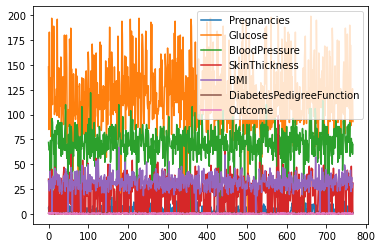

In [ ]:
#data visualisation
diabetes2.plot()

<AxesSubplot:>

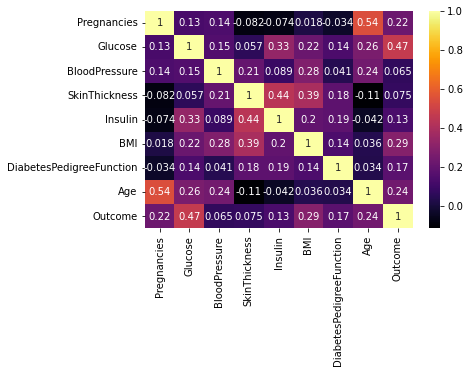

In [ ]:
corr_matrix=diabetes.corr()
sns.heatmap(corr_matrix,annot=True,cmap='inferno')

In [ ]:
diabetes3=diabetes.drop('BloodPressure',axis=1)

In [ ]:
diabetes4=diabetes.drop('SkinThickness',axis=1)

In [ ]:
diabetes4.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,0,33.6,0.627,50,1
1,1,85,66,0,26.6,0.351,31,0
2,8,183,64,0,23.3,0.672,32,1
3,1,89,66,94,28.1,0.167,21,0
4,0,137,40,168,43.1,2.288,33,1


In [ ]:
#splitting features and target variables
x=diabetes4.drop('Outcome',axis=1)
y=diabetes4['Outcome']

In [ ]:
#data engineering
from sklearn.model_selection import train_test_split



In [ ]:
#split data into train and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
#modelling
from sklearn.linear_model import LogisticRegression

In [ ]:
logistic_regression=LogisticRegression()

In [ ]:
logistic_regression.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred=logistic_regression.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
print('accuracy:',accuracy_score(y_test,y_pred))
print('confusion matrix: \n',confusion_matrix(y_test,y_pred))


accuracy: 0.8181818181818182
confusion matrix: 
 [[97 10]
 [18 29]]


In [ ]:
#saving model
import pickle

In [ ]:
filename="diabetes_model.pkl"
pickle.dump(logistic_regression,open(filename,'wb'))